# Coding Homework 1

## Overview

- [Note](#Note)
- [문제 1](#문제1)
- [문제 2](#문제2)
- [문제 3](#문제3)

# Note

watermark 를 사용하면 해당 주피터의 패키지의 버전을 확인할 수 있다. 
"`pip install watermark`" 를 사용하여 다운 받을 수 있다. 해당 watermark 에 표시되는 다른 패키지도 pip 로 설치 가능하다. 패키지의 버전이 다를 경우 에러가 날 수 있으므로 주의

In [2]:
%load_ext watermark
%watermark -a 'Moon Jeong-Hyeon' -u -d -p numpy,pandas,matplotlib,seaborn,sklearn

ModuleNotFoundError: No module named 'watermark'

# 제출방식

주어진 주피터 노트북을 바탕으로 워드 파일을 작성한다. 

각각의 문제마다 작성하라고 한 코드 부분(캡처)과 그림, 표, 설명등을 워드에
기입한다.



# 학습목표

* 문제1
    - 판다스, 넘파이등의 파이썬에서 데이터를 다루기위한 패키지를 사용한다.

* 문제2
    - matplotlib 패키지의 scatter plot을 상황에 맞게 사용할 수 있다.
    
* 문제3
    - jittering을 해보고 언제 필요한지 알 수 있다. 
    

# 문제 1 one-hot encoding 및 결측값 처리하기

## 데이터 소개

* 타겟 데이터
 * 1990년 캘리포니아의 각 행정 구역 내 주택 가격의 중앙값

* 특징 데이터 
 - MedInc : 행정 구역 내 소득의 중앙값
 - HouseAge : 행정 구역 내 주택 연식의 중앙값
 - AveRooms : 평균 방 갯수
 - AveBedrms : 평균 침실 갯수
 - Population : 행정 구역 내 인구 수
 - AveOccup : 평균 자가 비율
 - Latitude : 해당 행정 구역의 위도
 - Longitude : 해당 행정 구역의 경도

In [2]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [3]:
import pandas as pd
df = pd.DataFrame(california.data, columns=california.feature_names)
df_target = pd.DataFrame(california.target, columns=["Target"])
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [4]:
df_target.tail()

,Target
20635,0.781
20636,0.771
20637,0.923
20638,0.847
20639,0.894


# 문제1

* 캘리포니아 주택가격 중앙값에서 우리는 저렴한 편의 주택, 중간 주택, 비싼 가격의 주택의 전체적인 특성에 대해서 알고싶다. 현재는 numeric 변수로 이루어져 있기에 이를 분석하기가 쉽지 않다. 

* 중앙값을 카테고리 변수로 만든 후에 one-hot-인코딩을 만드는 메서드를 생성하라.

* 메서드를 구현하는 코드와 해당 메서드를 바탕으로 생성된 dataframe을 보고서에 기입하라.

## 요구사항
* 주어진 캘리포니아 주택가격의 중앙값은 numeric 변수이다.
    - 해당 numeric target 값을 category 변수로 바꾼다. 
        - category 변수로 바꾸기 위해서 범위가 주어진다. ex) bin = [1, 2, 3, 4]
        - 해당 범위에 들어오는 값은 label list의 값을 설정 한다.
            - 해당 범위에 들어오지 않는 sample의 경우 drop 시킨다. 
    - 그후 생성된 category 변수를 바탕으로 one-hot encoding을 만든다. 
    
* 아래에 주어진 메서드를 바탕으로 코드를 짠다. argument나 return 유형이 바뀌어서는 안된다.     

```python

# Args :
#     x = featrue data (pandas dataframe)
#     y = target data (pandas dataframe)
#     bins = list of target data range
#     labels = label of bins
# 
# Return : pandas dataframe

# hint 
# arguments are dataframe, use pandas library
# usd pandas.cut to make categorical variable

def make_onehot(df, target, bins, labels):

"""
구현해야할 부분
보고서에 캡처하세요
"""
    #category변수를 만들어준다.
    #data에 임시로 level 열을 만들어주고, 정해진 범위에 들어오지 못한경우 그 행의 data를버린다.
    data = pd.DataFrame(df)
    tar0 = np.array(target)
    tar = tar0[:,0]
    level_arr = pd.cut(tar, bins, labels=labels)
    level = pd.Series(np.array(level_arr), name='level')
    
    data = data.join(level)   
    data = data.dropna()
    del data['level']
    
    nplevel_arr = np.array(level_arr.tolist())
    
    #One-hot encoding 구현 
    #target값을 가지고 bin의 범위에 따라 0,1로 표시
    level1 = np.zeros(len(level),dtype='i')
    level2 = np.zeros(len(level),dtype='i')
    level3 = np.zeros(len(level),dtype='i')

    temp1 = pd.Series(level1,name='level_1')
    temp2 = pd.Series(level2,name='level_2')
    temp3 = pd.Series(level3,name='level_3')

    for i in range(0,len(level)) :
        if nplevel_arr[i] == "level_1":
            temp1.loc[i] = 1
        elif nplevel_arr[i]  ==  "level_2" :
            temp2.loc[i] = 1
        elif nplevel_arr[i]  == "level_3" :
            temp3.loc[i] = 1
 
    
    data['level_1']=temp1
    data['level_2']=temp2
    data['level_3']=temp3

    
    output = pd.DataFrame(data)
    return output


해당 방법을 바탕으로 제출

In [5]:
import numpy as np
import pandas as pd

In [6]:
# 주어진 target의 범위
bins = [0.2, 1.7, 2.5, 5]
labels = ["level_1", "level_2", "level_3"]


In [8]:
def make_onehot(df, target, bins, labels):
    
    #category변수를 만들어준다.
    #data에 임시로 level 열을 만들어주고, 정해진 범위에 들어오지 못한경우 그 행의 data를버린다.
    data = pd.DataFrame(df)
    tar0 = np.array(target)
    tar = tar0[:,0]
    level_arr = pd.cut(tar, bins, labels=labels)
    level = pd.Series(np.array(level_arr), name='level')
    
    data = data.join(level)   
    data = data.dropna()
    del data['level']
    
    nplevel_arr = np.array(level_arr.tolist())
    
    #One-hot encoding 구현 
    #target값을 가지고 bin의 범위에 따라 0,1로 표시

    
    level1 = np.zeros(len(level),dtype='i')
    level2 = np.zeros(len(level),dtype='i')
    level3 = np.zeros(len(level),dtype='i')

    temp1 = pd.Series(level1,name='level_1')
    temp2 = pd.Series(level2,name='level_2')
    temp3 = pd.Series(level3,name='level_3')

    for i in range(0,len(level)) :
        if nplevel_arr[i] == "level_1":
            temp1.loc[i] = 1
        elif nplevel_arr[i]  ==  "level_2" :
            temp2.loc[i] = 1
        elif nplevel_arr[i]  == "level_3" :
            temp3.loc[i] = 1
 
    
    data['level_1']=temp1
    data['level_2']=temp2
    data['level_3']=temp3

    
    output = pd.DataFrame(data)
    return output

In [9]:
data = make_onehot(df, target = df_target, bins= bins, labels=labels)

In [10]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,level_1,level_2,level_3
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,0,0,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,0,0,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0,0,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0,0,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0,0,1
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,0,0,1
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,0,0,1
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,0,1,0
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,0,1,0
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,0,0,1


원래 bin의 범위 때문에 target에 결측값이 생기게 되어 샘플수가 줄어드는 것 주의

---

# 문제2

* 문제 1에서 one-hot 인코딩 기반으로 하여 만들어진 dataframe을 바탕으로 scatter plot을 만들어 보고서에 기입 후, 이를 기반으로 얻을 수 있는 사실을 보고서에 서술하세요

In [13]:
import matplotlib.pyplot as plt

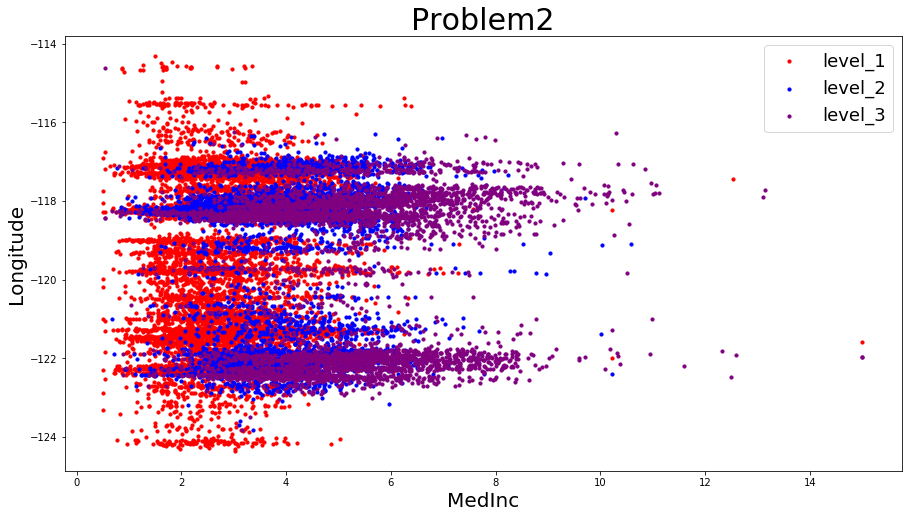

In [14]:
labels = ['level_1','level_2','level_3']
#같은 level의 것들을 묶어서 저장
level_1 = data[data['level_1'] == 1].dropna()
level_2 = data[data['level_2'] == 1].dropna()
level_3 = data[data['level_3'] == 1]. dropna()

#level 별로 다른 색으로 출력되도록 만들기
colors = ['red','blue','purple']
tempData = {'level_1':level_1, 'level_2':level_2, 'level_3':level_3}

fig, ax = plt.subplots(figsize = (15,8) )

for i, label in enumerate(labels) :
    ax.scatter(tempData[label]['MedInc'],tempData[label]['Longitude'],color = colors[i] ,s=10,label = label)            

plt.legend(loc="upper right", fontsize=18)
plt.title('Problem2', fontsize=30)
plt.xlabel('MedInc',fontsize=20)
plt.ylabel('Longitude',fontsize=20)

plt.show()


---

# 문제 3

In [15]:
from sklearn.datasets import make_blobs


sklearn 의 make_blobs를 이용하여 만든 데이터 X가 있다. 해당 X를 시각화 하면 다음과 같다.

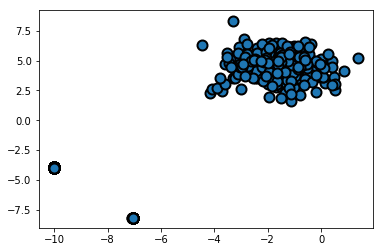

In [16]:
X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=1, cluster_std = 0.001)
X2, _ = make_blobs(n_samples=300, n_features=2, centers=1, random_state=1, cluster_std = 1)
X = np.vstack([X, X2])
plt.scatter(X[:, 0], X[:, 1], marker='o', s=100,
            edgecolor="k", linewidth=2)
plt.show()

데이터 X를 jittering을 주면 다음과 같은 scatter plot을 얻을 수 있다. 

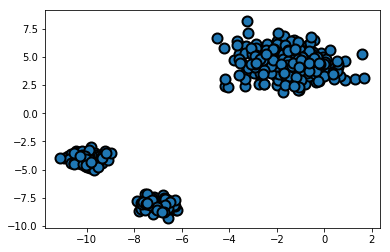

In [75]:
np.random.seed(seed=1)
xA, xB = np.random.normal(X[:,0], 0.4, len(X[:,0])), np.random.normal(X[:,1], 0.4, len(X[:,1]))

plt.scatter(xA,xB,marker='o', s=100, edgecolor="k", linewidth=2)
plt.show()

해당 scatter plot와 유사한 그림이 나올수 있도록 jittering을 주고 이러한 jittering이 필요한 경우에 대해서 서술하시오.